In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import *
from keras.layers import *
from keras.layers import Convolution2D as Conv2D

In [2]:
!wget https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz

--2024-08-06 14:58:46--  https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz
Resolving www.orand.cl (www.orand.cl)... 162.241.225.60
Connecting to www.orand.cl (www.orand.cl)|162.241.225.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203530245 (194M) [application/x-gzip]
Saving to: ‘ORAND-CAR-2014.tar.gz’

ORAND-CAR-2014.tar. 100%[===================>] 194.10M  17.3MB/s    in 13s     

2024-08-06 14:59:00 (15.3 MB/s) - ‘ORAND-CAR-2014.tar.gz’ saved [203530245/203530245]



In [3]:
!tar -xzvf /content/ORAND-CAR-2014.tar.gz

Streaming output truncated to the last 5000 lines.
ORAND-CAR-2014/CAR-B/b_train_images/b_car_004006.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_003727.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_004368.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_006406.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_005617.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_005230.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_003850.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_003293.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_004967.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_005234.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_005513.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_003051.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_004463.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_005193.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_004030.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_004672.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_003002.png
ORAND-CAR-2014/CAR-B/b_train_images/b_car_005737

In [4]:
# Define paths for CAR-A
pth = "/content/ORAND-CAR-2014/CAR-A"
img_train_dataset_a = f'{pth}/a_train_images'
train_dataset_file_a = f'{pth}/a_train_gt.txt'
img_test_dataset_a = f'{pth}/a_test_images'
test_dataset_file_a = f'{pth}/a_test_gt.txt'

# Define paths for CAR-B
pth_b = "/content/ORAND-CAR-2014/CAR-B"
img_train_dataset_b = f'{pth_b}/b_train_images'
train_dataset_file_b = f'{pth_b}/b_train_gt.txt'
img_test_dataset_b = f'{pth_b}/b_test_images'
test_dataset_file_b = f'{pth_b}/b_test_gt.txt'

In [5]:
import cv2
import numpy as np
import os

def load_images_and_labels(img_path, label_file):
    images = []
    labels = []
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Remove any leading/trailing whitespace characters
            line = line.strip()
            if line:  # Check if line is not empty
                parts = line.split('\t')  # Split by tab character
                if len(parts) == 2:  # Ensure there are exactly two parts
                    img_file, label = parts
                    img_path_full = os.path.join(img_path, img_file)
                    if os.path.isfile(img_path_full):
                        img = cv2.imread(img_path_full, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            images.append(img)
                            labels.append(label)
                        else:
                            print(f"Warning: Failed to read image {img_path_full}")
                    else:
                        print(f"Warning: Image file {img_path_full} does not exist")
                else:
                    print(f"Warning: Line format is incorrect: {line}")
    return images, labels

# Load CAR-A dataset
img_train_a, labels_train_a = load_images_and_labels(img_train_dataset_a, train_dataset_file_a)
img_test_a, labels_test_a = load_images_and_labels(img_test_dataset_a, test_dataset_file_a)

# Load CAR-B dataset
img_train_b, labels_train_b = load_images_and_labels(img_train_dataset_b, train_dataset_file_b)
img_test_b, labels_test_b = load_images_and_labels(img_test_dataset_b, test_dataset_file_b)

# Ensure all lists are of the correct type before concatenating
if isinstance(img_train_a, list) and isinstance(img_train_b, list):
    xtrain = img_train_a + img_train_b
else:
    raise TypeError("Expected img_train_a and img_train_b to be lists")

if isinstance(labels_train_a, list) and isinstance(labels_train_b, list):
    ytrain = labels_train_a + labels_train_b
else:
    raise TypeError("Expected labels_train_a and labels_train_b to be lists")

if isinstance(img_test_a, list) and isinstance(img_test_b, list):
    xtest = img_test_a + img_test_b
else:
    raise TypeError("Expected img_test_a and img_test_b to be lists")

if isinstance(labels_test_a, list) and isinstance(labels_test_b, list):
    ytest = labels_test_a + labels_test_b
else:
    raise TypeError("Expected labels_test_a and labels_test_b to be lists")


<ipython-input-6-a5411f88de96>:66: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(digits), 1, i+1)


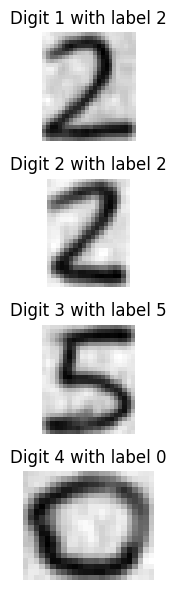

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Function to extract digits and their corresponding bounding boxes
def extract_digits_with_labels(image, label):
    # Ensure the image is grayscale
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    # Convert to uint8 if not already
    if gray.dtype != np.uint8:
        gray = gray.astype(np.uint8)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)

    # Find contours
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right based on their x-coordinate
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    digits = []
    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if h > 10 and w > 10:  # Filter out too small contours
            digit = gray[y:y+h, x:x+w]
            if digit.shape[0] > 0 and digit.shape[1] > 0:
                digits.append(digit)
                bounding_boxes.append((x, y, w, h))

    return digits, bounding_boxes

# Function to show image with contours
def show_image_with_contours(image, label):
    digits, bounding_boxes = extract_digits_with_labels(image, label)

    # Create a copy of the original image to draw contours on
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for x, y, w, h in bounding_boxes:
        cv2.rectangle(image_with_contours, (x, y), (x+w, y+h), (0, 255, 0), 2)

    plt.figure(figsize=(18, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Original image with contours
    plt.subplot(1, 3, 2)
    plt.imshow(image_with_contours, cmap='gray')
    plt.title('Original Image with Contours')
    plt.axis('off')

    # Extracted digits and their labels
    plt.subplot(1, 3, 3)
    for i, digit in enumerate(digits):
        plt.subplot(len(digits), 1, i+1)
        plt.imshow(digit, cmap='gray')
        if i < len(label):
            plt.title(f'Digit {i+1} with label {label[i]}')
        else:
            plt.title(f'Digit {i+1} with label ?')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
example_index = 0  # Change the index to display different images
example_image = xtrain[example_index]
example_label = ytrain[example_index]
show_image_with_contours(example_image, example_label)

In [7]:
import numpy as np
import cv2

def preprocess_image(image, target_size=(28, 28)):
    """Resize the image to the target size and ensure it has a single channel."""
    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
    if len(resized_image.shape) == 2:
        resized_image = np.expand_dims(resized_image, axis=-1)
    return resized_image

def create_contoured_dataset(images, labels, target_size=(28, 28), max_label_length=8):
    x_contoured = []
    y_contoured = []

    for img, label in zip(images, labels):
        # Extract digits and bounding boxes
        digits, _ = extract_digits_with_labels(img, label)

        # Ensure labels are correctly handled
        if len(label) > max_label_length:
            label = label[:max_label_length]  # Truncate label if too long
        else:
            label = label.ljust(max_label_length, '-')  # Fill with a placeholder if too short

        for i, digit in enumerate(digits):
            if i < max_label_length:  # Ensure we don't go beyond max_label_length
                digit_label = int(label[i]) if label[i].isdigit() else -1  # Convert to integer, -1 for invalid
                preprocessed_digit = preprocess_image(digit, target_size=target_size)
                x_contoured.append(preprocessed_digit)
                y_contoured.append(digit_label)

    x_contoured = np.array(x_contoured)  # Convert to NumPy array
    y_contoured = np.array(y_contoured)

    return x_contoured, y_contoured

# Example usage
x_train_contoured, y_train_contoured = create_contoured_dataset(xtrain, ytrain)
x_test_contoured, y_test_contoured = create_contoured_dataset(xtest, ytest)

# Verify shapes
print(f"x_train_contoured shape: {x_train_contoured.shape}")
print(f"y_train_contoured shape: {y_train_contoured.shape}")

x_train_contoured shape: (28062, 28, 28, 1)
y_train_contoured shape: (28062,)


In [8]:
# Filter out invalid labels
def filter_valid_labels(x, y):
    valid_indices = [i for i, label in enumerate(y) if 0 <= label < 10]
    return x[valid_indices], y[valid_indices]

# Model creation function
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Function to predict image
def predict_image(image, model, target_size=(28, 28), max_label_length=8):
    digits, _ = extract_digits_with_labels(image, "")
    predictions = []
    for digit in digits:
        preprocessed_digit = preprocess_image(digit, target_size=target_size)
        preprocessed_digit = np.expand_dims(preprocessed_digit, axis=0)
        pred = model.predict(preprocessed_digit)
        predicted_label = np.argmax(pred, axis=1)[0]
        predictions.append(predicted_label)
    return predictions

# Function to display prediction results
def display_prediction_results(image, true_label, predictions):
    digits, bounding_boxes = extract_digits_with_labels(image, "")
    image_with_predictions = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for (x, y, w, h), predicted_label in zip(bounding_boxes, predictions):
        cv2.putText(image_with_predictions, str(predicted_label), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.rectangle(image_with_predictions, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.figure(figsize=(10, 5))
    plt.imshow(image_with_predictions)
    plt.title('Image with Predicted Digits')
    plt.axis('off')
    plt.show()
    predicted_label_string = ''.join(str(label) for label in predictions)
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label_string}")


In [10]:
# Filter out invalid labels
x_train_contoured, y_train_contoured = filter_valid_labels(x_train_contoured, y_train_contoured)
x_test_contoured, y_test_contoured = filter_valid_labels(x_test_contoured, y_test_contoured)

#train the model
input_shape = x_train_contoured[0].shape
model = create_model(input_shape)
history = model.fit(x_train_contoured, y_train_contoured, epochs=15, validation_data=(x_test_contoured, y_test_contoured))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_contoured, y_test_contoured)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3644 - loss: 10.5201 - val_accuracy: 0.4385 - val_loss: 1.8036
Epoch 2/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4642 - loss: 1.7640 - val_accuracy: 0.4441 - val_loss: 1.8178
Epoch 3/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4906 - loss: 1.6771 - val_accuracy: 0.4598 - val_loss: 1.8353
Epoch 4/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5102 - loss: 1.5851 - val_accuracy: 0.4528 - val_loss: 1.8538
Epoch 5/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5447 - loss: 1.4834 - val_accuracy: 0.4384 - val_loss: 1.9595
Epoch 6/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5717 - loss: 1.3840 - val_accuracy: 0.4349 - val_loss: 2.0884
Epoch 7/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6214 - loss: 1.2308 - val_accuracy: 0.4266 - val_loss: 2.4583
Epoch 8/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6661 - loss: 1.0822 - val_accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


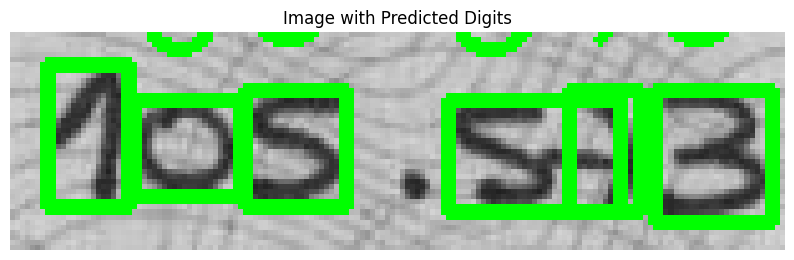

True Label: 105573
Predicted Label: 105573


In [19]:
# Example usage for prediction
example_index = 111
example_image = xtest[example_index]
example_label = ytest[example_index]
predictions = predict_image(example_image, model)
display_prediction_results(example_image, example_label, predictions)

951/951 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


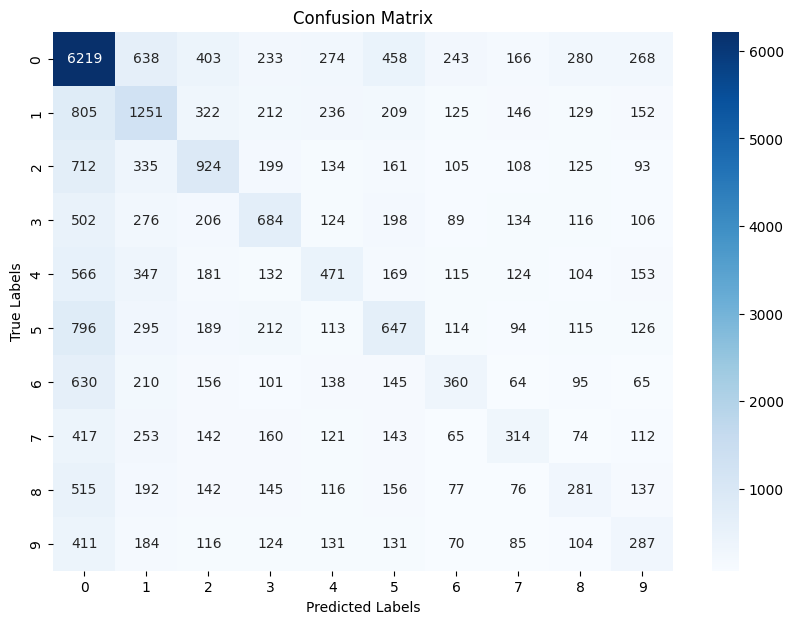

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.68      0.60      9182
           1       0.31      0.35      0.33      3587
           2       0.33      0.32      0.33      2896
           3       0.31      0.28      0.30      2435
           4       0.25      0.20      0.22      2362
           5       0.27      0.24      0.25      2701
           6       0.26      0.18      0.22      1964
           7       0.24      0.17      0.20      1801
           8       0.20      0.15      0.17      1837
           9       0.19      0.17      0.18      1643

    accuracy                           0.38     30408
   macro avg       0.29      0.28      0.28     30408
weighted avg       0.35      0.38      0.36     30408



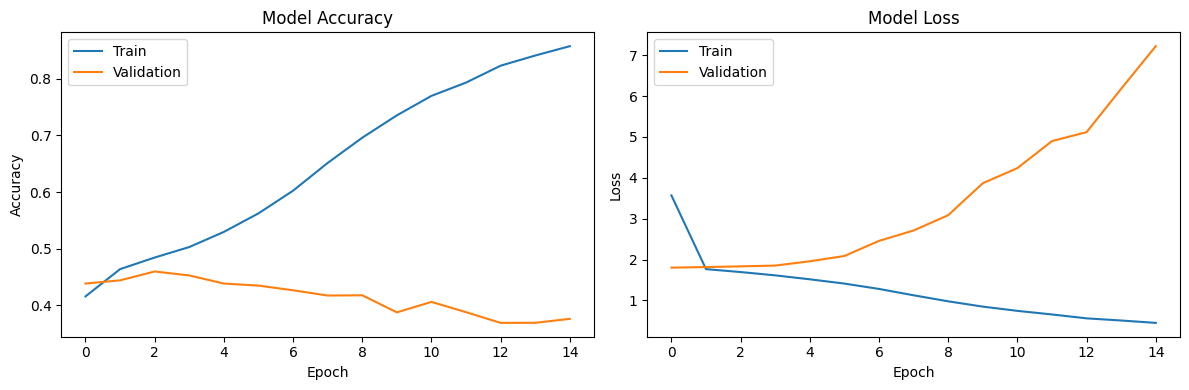

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions for the test set
y_test_pred = model.predict(x_test_contoured)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_contoured, y_test_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
class_report = classification_report(y_test_contoured, y_test_pred_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

# Fit the generator to the training data
datagen.fit(x_train_contoured)

# Adding Dropout and Batch Normalization

In [14]:
from tensorflow.keras.layers import Dropout, BatchNormalization

def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# Using Early Stopping

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
# Re-create the model with regularization
input_shape = x_train_contoured[0].shape
model = create_model(input_shape)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(x_train_contoured, y_train_contoured, batch_size=32),
                    epochs=30,
                    validation_data=(x_test_contoured, y_test_contoured),
                    callbacks=[early_stopping])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


741/741 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.2993 - loss: 2.2777 - val_accuracy: 0.3659 - val_loss: 1.9286
Epoch 2/30
741/741 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.3830 - loss: 1.9387 - val_accuracy: 0.4370 - val_loss: 1.8142
Epoch 3/30
741/741 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4023 - loss: 1.8818 - val_accuracy: 0.4226 - val_loss: 1.8562
Epoch 4/30
741/741 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4185 - loss: 1.8388 - val_accuracy: 0.4848 - val_loss: 1.7397
Epoch 5/30
741/741 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.4390 - loss: 1.7973 - val_accuracy: 0.4897 - val_loss: 1.7101
Epoch 6/30
741/741 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4442 - loss: 1.7776 - val_accuracy: 0.4608 - val_loss: 1.7641
Epoch 7/30
741/741 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4518 - loss: 1.7711 - val_accuracy: 0.5013 - val_loss: 1.6604
Epoch 8/30
741/741 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4584 - loss: 1.7511 - val_accurac

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_contoured, y_test_contoured)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


951/951 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5564 - loss: 1.5617
Test accuracy: 56.22%


951/951 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


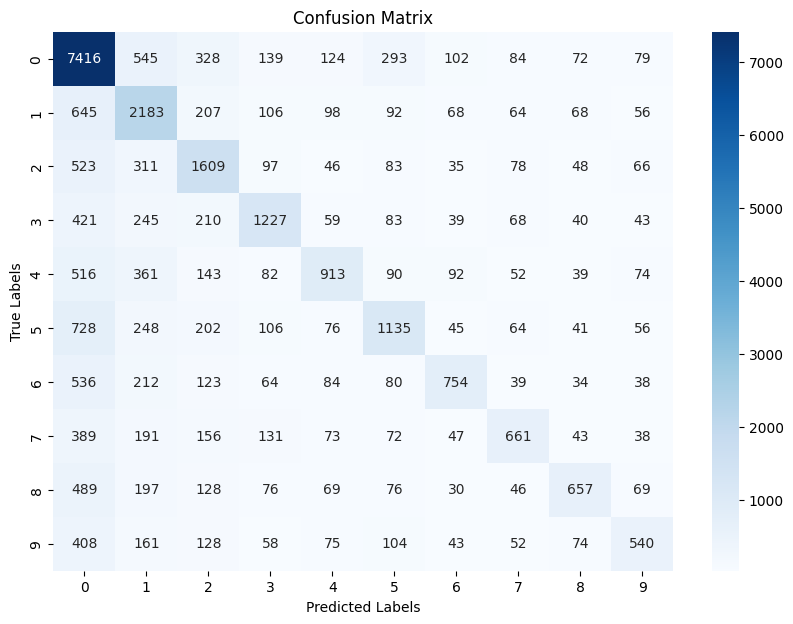

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.81      0.70      9182
           1       0.47      0.61      0.53      3587
           2       0.50      0.56      0.52      2896
           3       0.59      0.50      0.54      2435
           4       0.56      0.39      0.46      2362
           5       0.54      0.42      0.47      2701
           6       0.60      0.38      0.47      1964
           7       0.55      0.37      0.44      1801
           8       0.59      0.36      0.44      1837
           9       0.51      0.33      0.40      1643

    accuracy                           0.56     30408
   macro avg       0.55      0.47      0.50     30408
weighted avg       0.56      0.56      0.55     30408



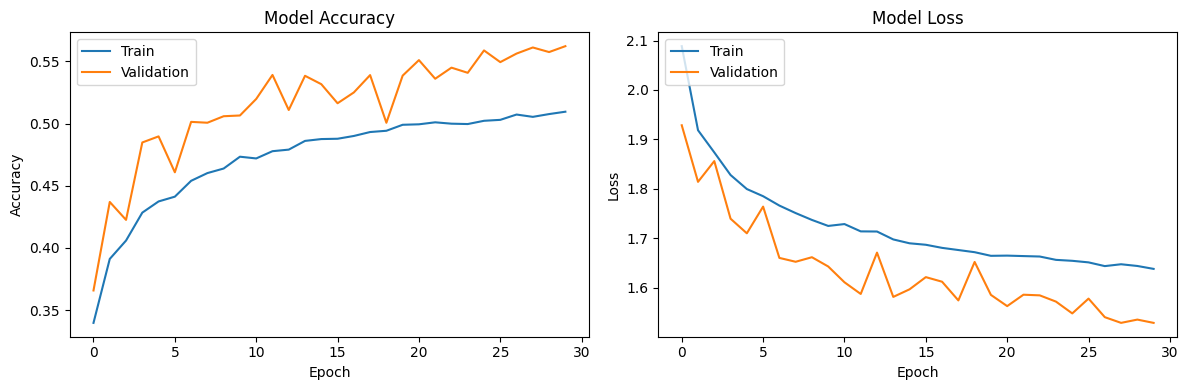

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions for the test set
y_test_pred = model.predict(x_test_contoured)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_contoured, y_test_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
class_report = classification_report(y_test_contoured, y_test_pred_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)